## Plotting data from ERDDAP: Argo floats

Argo floats are autonomous platforms that drift around the world oceans and sink/rise on ~10 day intervals.  As they sink/rise they measure oceanic properties.  They are thus referred to as "profiling floats".  More details can be found at http://www.argo.ucsd.edu/.

Here we will try to read Argo profile data from the APDRC ERDDAP server.  This is just another way to get at data, but it is extremely convenient since we can specify right at the beginning all sorts of parameters (slice, subset, etc.).  The APDRC Argo data are at http://apdrc.soest.hawaii.edu/erddap/search/index.html?page=1&itemsPerPage=1000&searchFor=Argo

At the top of the page is a link to the Pacific floats.  To the left is a link to "table DAP data"; select that.  The subsequent page will give you all sorts of choices as to date/lat/lon/variables and more.  Select whatever you like, then under "file type" select ".nc" and then click "just generate the URL".  This should give you a URL with the data set name followed by a long string of your specified contraints.  The first part will look like:

http://apdrc.soest.hawaii.edu/erddap/tabledap/argoFloats_pacific_1998_local.nc

Here I will just use that.

In [14]:
# As per usual, import all the needed modules.  Here we use "urllib" to get the data
import os
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset, num2date
import time, calendar

In [15]:
# In this section we read the data in.  First we specify our URL (cut/paste from ERDDAP server)
url = "http://apdrc.soest.hawaii.edu/erddap/tabledap/argoFloats_pacific_1998_local.nc"

# We now read the data via OPeNDAP and put them into a netcdf file (we'll delete this later)
response = urllib.request.urlretrieve(url,'test.nc')
dataset = Dataset('test.nc')
lats = dataset.variables['latitude'][:]
lons = dataset.variables['longitude'][:]
time = dataset.variables['time']
times = time[:]

In [16]:
# This is one way to get the index to the first and last times
#  and convert to a date
t1 = times.min()
t2 = times.max()
date1 = num2date(t1, units=time.units)
date2 = num2date(t2, units=time.units)

# Now we have what we want, let's close and remove the file
dataset.close()
os.remove('test.nc')

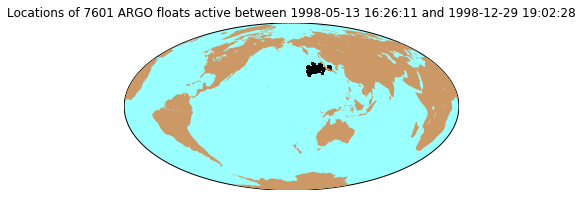

In [18]:
# Finally, we draw map with markers for float locations
m = Basemap(projection='hammer',lon_0=180)
x, y = m(lons,lats)
m.drawmapboundary(fill_color='#99ffff')
m.fillcontinents(color='#cc9966',lake_color='#99ffff')
m.scatter(x,y,3,marker='o',color='k')
plt.title('Locations of %s ARGO floats active between %s and %s' %\
        (len(lats),date1,date2),fontsize=12)
plt.show()